### Project Artificial Neural Network - José Lise
## House prices: Regression based on Ames Housing Dataset
The dataset is available on [Kaggle website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). The goal is to build a regression model for the Houses's SalePrice from the train dataset.  
I will first make an exploratory analysis of the data, to discover the most important features, the target variable distribution and so on. After this step I will present the data pre-processing steps like data cleaning, data normalization and features engineering. Then I will present the modelling part. Several models will be studied and at the end the one providing the best result will be selected to apply on the Kaggle test dataset. And I will discuss possible improvements. 


In [53]:
# Import of the main general purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from pandas.plotting import scatter_matrix

import seaborn as sns

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Dataset read 
The dataset is provided in 2 files: 
* train.csv: The training dataset. That's the dataset that I will use for training and validation
* test.csv: The test dataset to be used to send final submission to kaggle to get a score

In [54]:
# Read in the dataset as a dataframe
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [55]:
# Raw statistics 
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
#check for dupes for Id
idsUnique = len(set(train_df.Id))
idsTotal = train_df.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


## Exploratory Data Analysis

In [57]:
# Preview the data we're working with
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We see above that there will be null or missing values to manage.
Check how features are correlated to each other and to SalePrice.

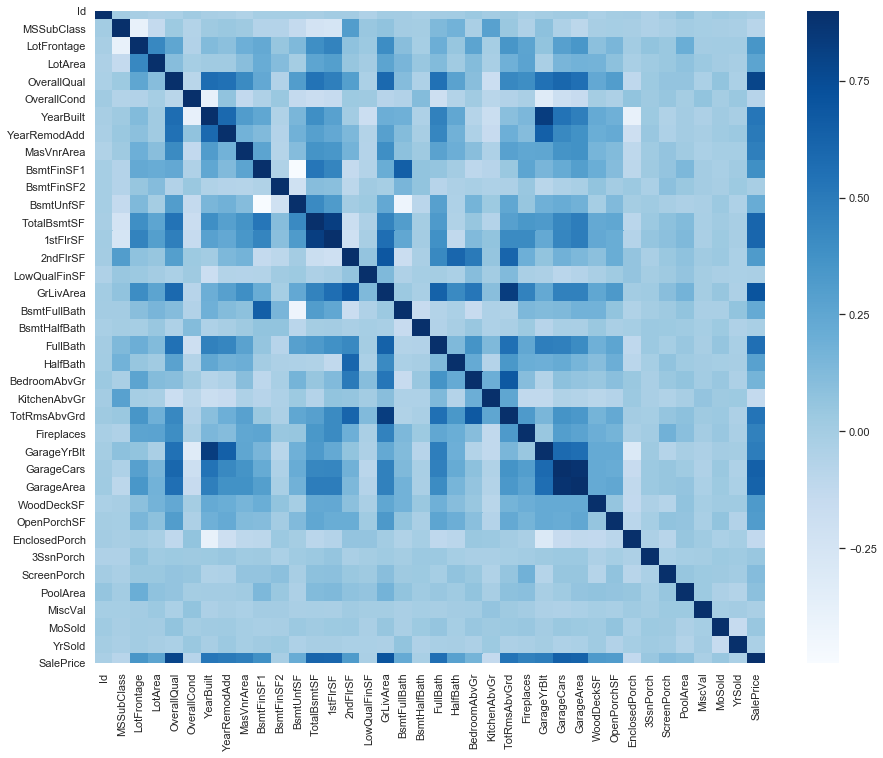

In [58]:
corr = train_df.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


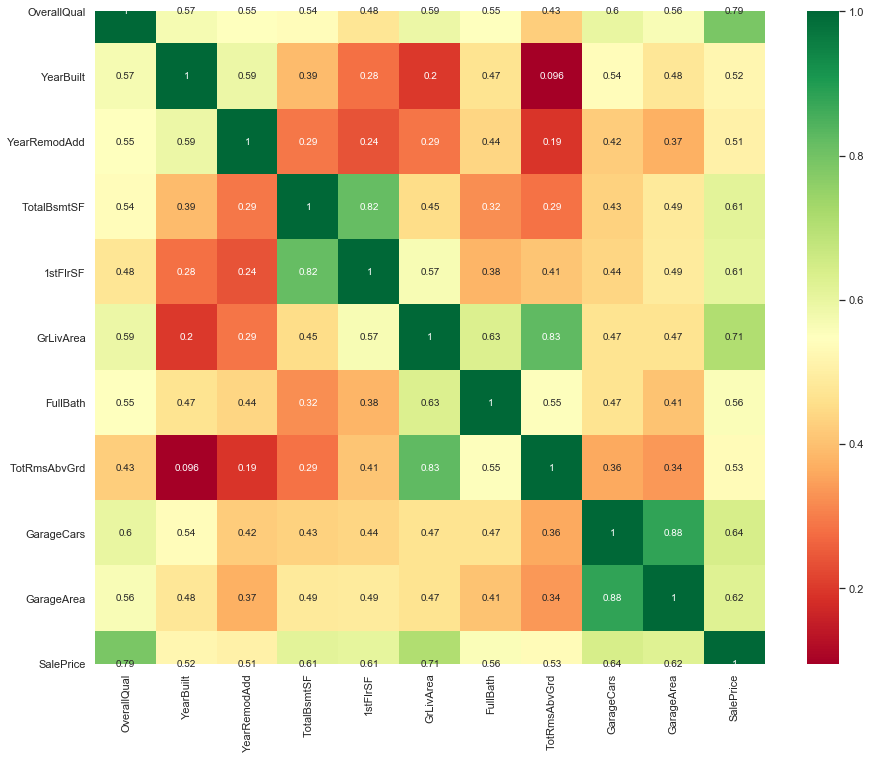

In [59]:
# Check the most correlated features: Features with an absolute correlation > 0.5
top_corr_features = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(15,12))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(train_df[top_corr_features].columns)

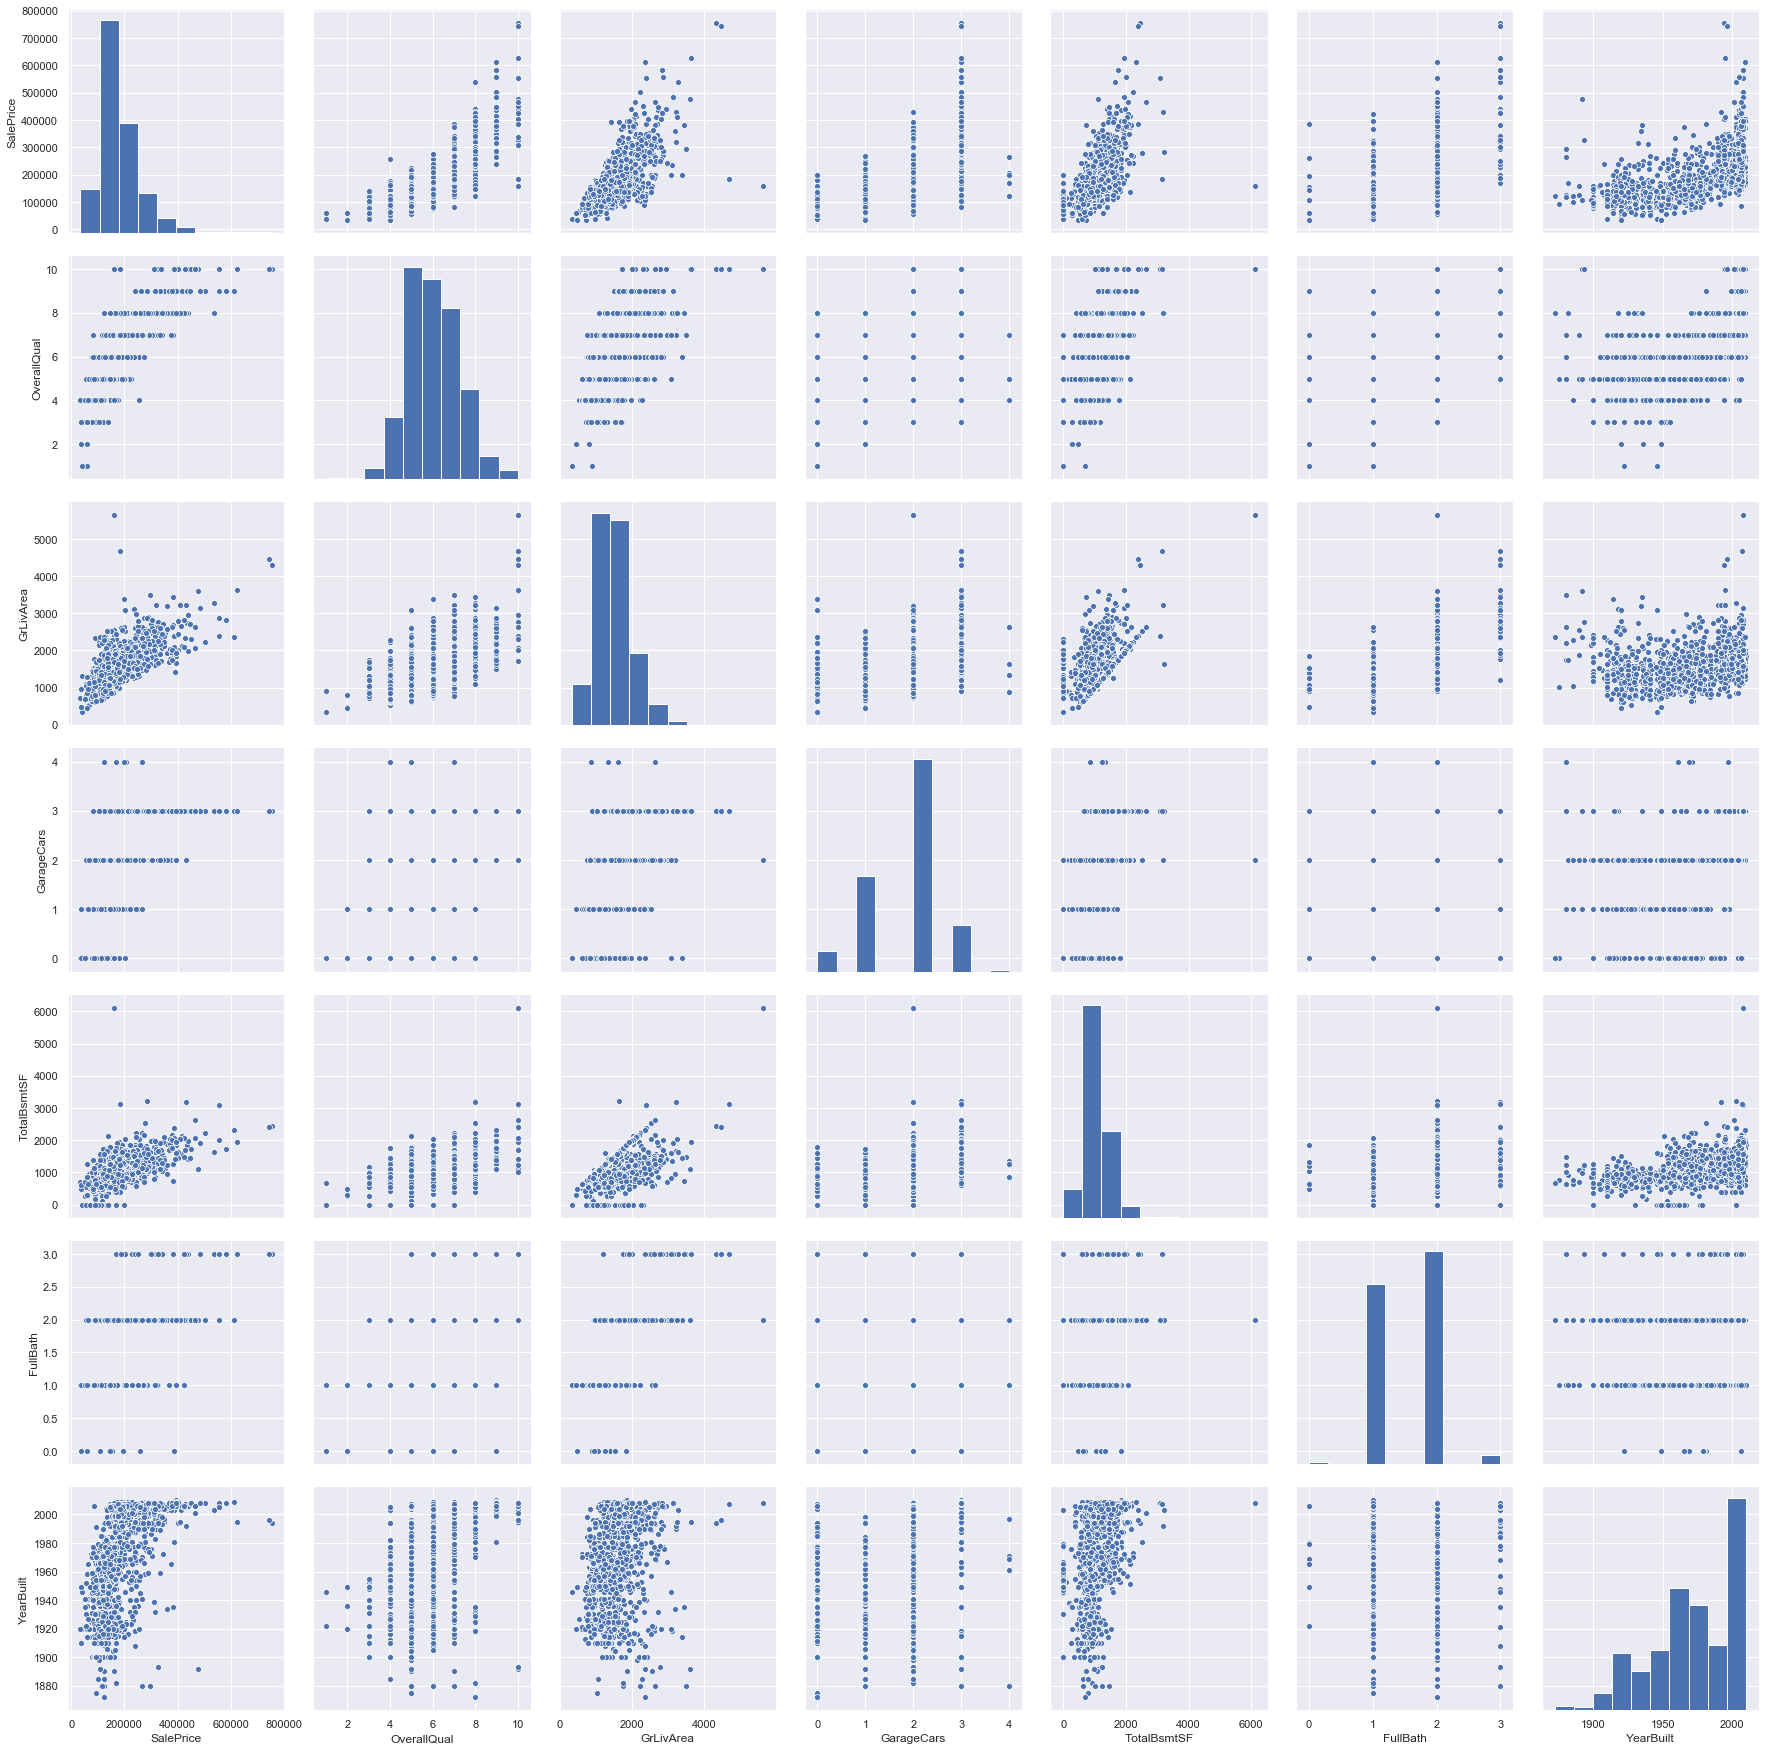

In [60]:
# Check how each feature is correlated to SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height = 3.5)
plt.show();



We see that SalePrice is correlated to OverallQual, YearBuilt, TotalBsmtSF, LotArea, GrLivArea. Let's take a look at those specific features: 


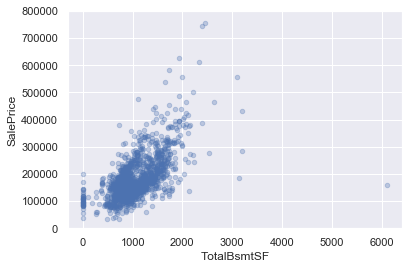

In [61]:
data = pd.concat([train_df['SalePrice'], train_df['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', alpha=0.3, ylim=(0,800000))

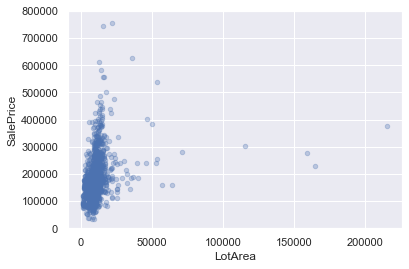

In [62]:
data = pd.concat([train_df['SalePrice'], train_df['LotArea']], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

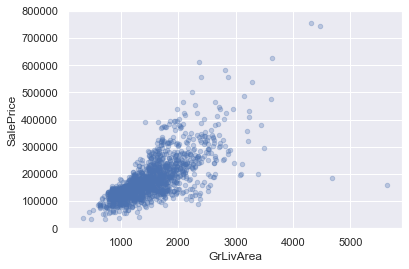

In [63]:
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', alpha=0.3, ylim=(0,800000))

In [64]:
# Remove the Ids columns from train and test, as they are unique for each row and hence not useful for the model
train_ID = train_df['Id']
test_ID = test_df['Id']
train_df.drop(['Id'], axis=1, inplace=True)
test_df.drop(['Id'], axis=1, inplace=True)
train_df.shape, test_df.shape

((1460, 80), (1459, 79))

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.


 mu = 180921.20 and sigma = 79415.29



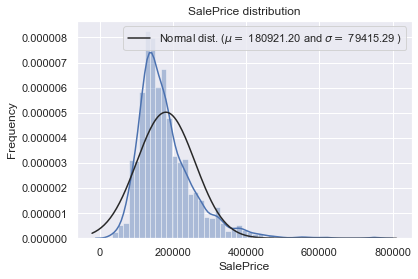

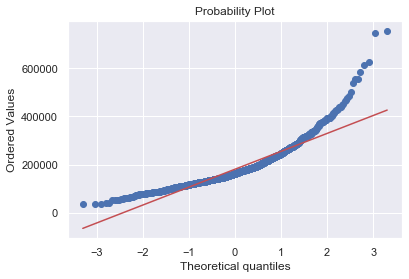

In [65]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

def display_dist(df,f):
    
    sns.distplot(df[f] , fit=norm);

# Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df[f])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')

    fig = plt.figure()
    res = stats.probplot(df[f], plot=plt)
    plt.show()

display_dist(train_df,'SalePrice')

We see a positive skew. This can be fixed by applying a log1p function. Even if it's not mandatory for the target variable to follow a normal distribution, it's better and also works as a normalisation. For instance for linear regression modeling, it's the residuals that have to follow a normal distribution.  

In [66]:
train_df.SalePrice = np.log1p(train_df.SalePrice )
#y = train_df.SalePrice

SalePrice distribution after log normalisation


 mu = 12.02 and sigma = 0.40



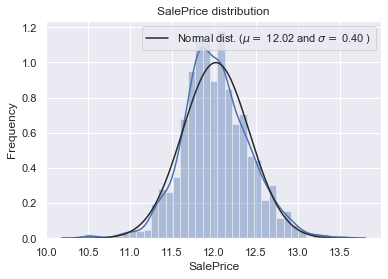

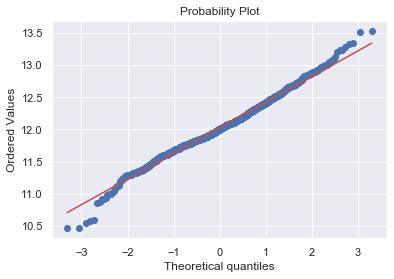

In [67]:
display_dist(train_df,'SalePrice')

We confirm that after transformation, the SalePrice varaible is closer to a normal distribution. 

### Pre-processing

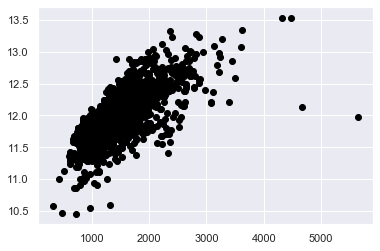

In [68]:
plt.scatter(y =train_df.SalePrice,x = train_df.GrLivArea,c = 'black')
plt.show()
#we can see the outlier in the below image

In the cell below, we removing outliers by removing data for GrLivArea >= 4000 as recommended by the [dataset creator](https://ww2.amstat.org/publications/jse/v19n3/decock.pdf). 


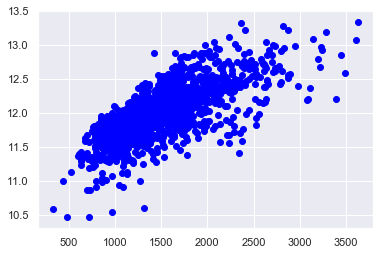

In [69]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
train_df = train_df[train_df.GrLivArea < 4000]
y = train_df.SalePrice
plt.scatter(y =train_df.SalePrice,x = train_df.GrLivArea,c = 'blue')
plt.show()

Concatenation of the train and test datasets in the same dataset for preprocessing. 

In [70]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2915, 79)


Missing data check

In [71]:
all_data_nas = all_data.isnull().sum()
all_data_nas = all_data_nas[all_data_nas>0]
all_data_nas.sort_values(ascending=False)


PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
dtype: int64

Check the features the most correlated to SalePrice

In [72]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

#Keep the 10 more important features to create polynomials
poly = corr.SalePrice[1:11]
print(poly)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.819240
GrLivArea        0.718844
GarageCars       0.680408
GarageArea       0.655212
TotalBsmtSF      0.641553
1stFlrSF         0.613742
FullBath         0.590919
YearBuilt        0.588977
YearRemodAdd     0.568986
GarageYrBlt      0.544005
TotRmsAbvGrd     0.533446
Fireplaces       0.487126
MasVnrArea       0.430073
BsmtFinSF1       0.382710
LotFrontage      0.363286
WoodDeckSF       0.330573
OpenPorchSF      0.327038
HalfBath         0.311191
2ndFlrSF         0.306605
LotArea          0.258945
BsmtFullBath     0.238851
BsmtUnfSF        0.223248
BedroomAbvGr     0.204117
ScreenPorch      0.123860
MoSold           0.062231
3SsnPorch        0.056065
PoolArea         0.040679
BsmtFinSF2       0.006420
BsmtHalfBath    -0.014974
MiscVal         -0.019752
YrSold          -0.034319
OverallCond     -0.036843
LowQualFinSF    -0.037698
MSSubClass      -0.075083
KitchenAbvGr    -0.147891
EnclosedPorch   

The cell below is optional and is only required if adding polynomial features is required

In [114]:
#poly.shape
#print(poly.index.values[0])
# Add polynomial features for more 10 important features
for i in range(10):
    if poly.index[i] not in ['GrLivArea','TotalBsmtSF','YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
        print(poly.index[i])
        col = poly.index.values[i]
        all_data[col+'-2'] = all_data.loc[:,col]**2
        all_data[col+'-3'] = all_data.loc[:,col]**3
        #all_data[col+'-4'] = all_data.loc[:,col]**4
        #all_data[col+'-sqrt'] = np.sqrt(np.absolute(all_data.loc[:,col]))
    
all_data.shape

OverallQual
GarageCars
GarageArea
1stFlrSF
FullBath


(2915, 89)

In [73]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = all_data.select_dtypes(include=['object']).columns
print(categorical_features,"\n", len(categorical_features))


Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object') 
 43


In [74]:
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
print(numerical_features,"\n", len(numerical_features))

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object') 
 36


In [75]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = all_data.select_dtypes(include = ["object"]).columns
numerical_features = all_data.select_dtypes(exclude = ["object"]).columns
#numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
all_num = all_data[numerical_features]
all_cat = all_data[categorical_features]

Numerical features : 36
Categorical features : 43


In [76]:
# Handle missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(all_num.isnull().values.sum()))
all_num = all_num.fillna(all_num.median())
print("Remaining NAs for numerical features in All : " + str(all_num.isnull().values.sum()))


NAs for numerical features in train : 678
Remaining NAs for numerical features in All : 0


In [77]:
# check the skewness of the numerical features
from scipy.stats import skew 
skewness = all_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
MSSubClass        1.374804
1stFlrSF          1.253011
LotFrontage       1.245296
GrLivArea         0.977860
BsmtFinSF1        0.974092
BsmtUnfSF         0.920498
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.667372
BsmtFullBath      0.622820
OverallCond       0.569143
BedroomAbvGr      0.328129
GarageArea        0.219649
MoSold            0.198411
OverallQual       0.181902
FullBath          0.159917
YrSold            0.130909
GarageCars       -0.218414
GarageYrBlt      -0.396584
YearRemodAdd     -0.449113
YearBuilt        -0.598087
dtype: float64

In [78]:
skewness = skewness[abs(skewness)>0.5]
skewness.index


Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt'],
      dtype='object')

In [79]:
skew_features = all_data[skewness.index]
skew_features.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
       'Fireplaces', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'OverallCond', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt'],
      dtype='object')

In [80]:
#we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
skew_features = np.log1p(skew_features)


In [81]:
# Create dummy features for categorical values via one-hot encoding
all_cat.shape 

(2915, 43)

In [82]:
all_cat = pd.get_dummies(all_cat)
all_cat.shape

(2915, 251)

In [83]:
all_cat.head()

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [84]:
str(all_cat.isnull().values.sum())

'0'

 Rebuild the train and test sets

In [85]:
all_data = pd.concat([all_cat,all_num],axis=1)
train = all_data[:ntrain]
test = all_data[ntrain:]
train.shape
#str(all_data.isnull().values.sum())
#test.shape

(1456, 287)

## Modeling

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer


In [87]:
# Join numerical & categorical feature
#train = pd.concat([train_cat,train_num],axis=1)
train.shape


(1456, 287)

In [88]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)


In [89]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1019, 287), (437, 287), (1019,), (437,))

In [90]:
X_train.head(3)

,Alley_Grvl,Alley_Pave,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
328,0,1,1,0,0,0,0,0,0,0,...,6,6,0,0,10,844.0,0,1916,1994,2009
1024,0,0,1,0,0,0,0,0,0,0,...,5,5,0,143,6,1268.0,0,1960,1960,2010
841,0,0,0,0,1,0,0,0,0,0,...,4,5,0,0,10,1800.0,0,1961,1961,2007


In [91]:
# Defining cross_val_score function for both train and test sets separately
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

### Simple Linear model

In [92]:
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)


Plot prediction and residuals

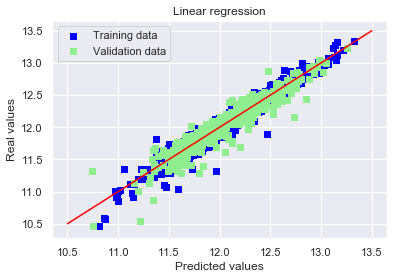

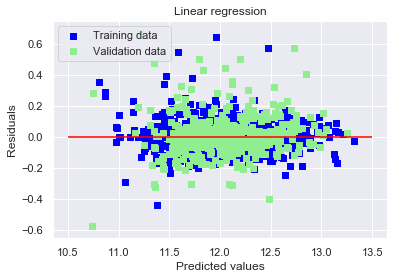

In [93]:
# Plot predictions
plt.scatter(train_pre, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pre, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
#plt.plot([2.0, 4.5], [2., 4.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(test_pre, test_pre - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
#plt.hlines(y = 0, xmin = 2.0, xmax = 4.5, color = "red")
plt.show()


Mean square error for the simple linear model

In [94]:
lin_train_mse = mean_squared_error(y_train, train_pre)
lin_train_rmse = np.sqrt(lin_train_mse)

lin_test_mse = mean_squared_error(y_test, test_pre)
lin_test_rmse = np.sqrt(lin_test_mse)

print('rmse on train: ',lin_train_rmse)
print('rmse on test: ',lin_test_rmse)

rmse on train:  0.08696355726136644
rmse on test:  0.1307713773112265


Simple cross validation for the linear model

In [95]:
# Simple cross validation for linear model 
scores_train = cross_val_score(lr, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_train = np.sqrt(-scores_train)

scores_test = cross_val_score(lr, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
rmse_scores_test = np.sqrt(-scores_test)

In [96]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    

In [97]:
# score for Training
display_scores(rmse_scores_train)

Scores: [0.12891838 0.16229092 0.12965993 0.15738672 0.11710523 0.11614246
 0.1432097  0.12331894 0.11694746 0.11737592]
Mean: 0.13123556591843338
Standard deviation: 0.016388807738767847


In [98]:
# score for Test
display_scores(rmse_scores_test)

Scores: [0.15144291 0.15935711 0.18080404 0.19776809 0.15610275 0.12829162
 0.16775998 0.20206466 0.1563933  0.14946477]
Mean: 0.1649449234430344
Standard deviation: 0.021593084842164687


### Ridge Regression Regularization with cross validation

In [99]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 10.0
Try again for more precision with alphas centered around 10.0
Best alpha : 14.0
Ridge RMSE on Training set : 0.116175242830898
Ridge RMSE on Test set : 0.12212880980949559


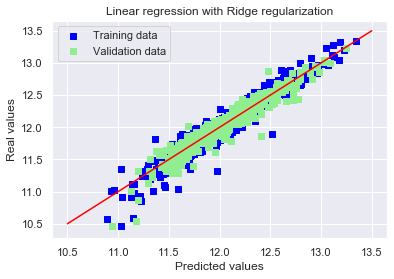

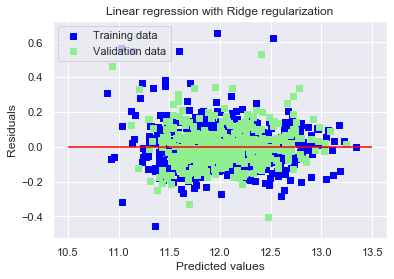

Ridge picked 283 features and eliminated the other 4 features


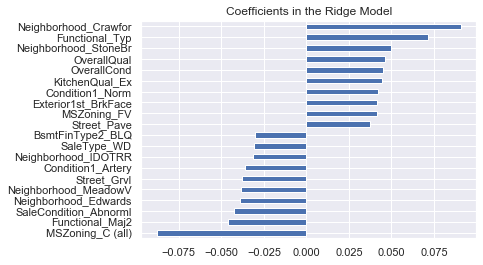

Index(['MSZoning_C (all)', 'Functional_Maj2', 'SaleCondition_Abnorml',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Street_Grvl',
       'Condition1_Artery', 'Neighborhood_IDOTRR', 'SaleType_WD',
       'BsmtFinType2_BLQ', 'Street_Pave', 'MSZoning_FV', 'Exterior1st_BrkFace',
       'Condition1_Norm', 'KitchenQual_Ex', 'OverallCond', 'OverallQual',
       'Neighborhood_StoneBr', 'Functional_Typ', 'Neighborhood_Crawfor'],
      dtype='object')


In [100]:
# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

print(imp_coefs.index)


### Lasso Regression Regularization with Cross Validation

In [101]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas = [0.0005, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 3, 6, 10, 30, 60])
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)
print("Lasso RMSE on Training set :", rmse_CV_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_CV_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

best alpha 0.0005
Try again for more precision with alphas centered around 0.0005
Best alpha : 0.0003
Lasso RMSE on Training set : 0.11632123002352128
Lasso RMSE on Test set : 0.12332009440497142


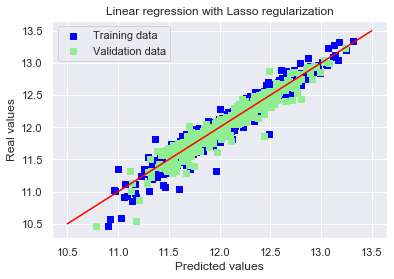

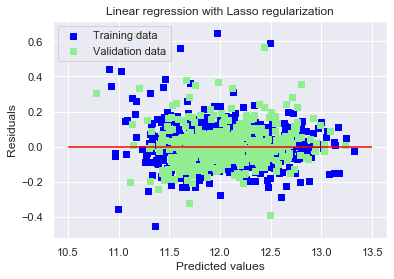

Lasso picked 140 features and eliminated the other 147 features


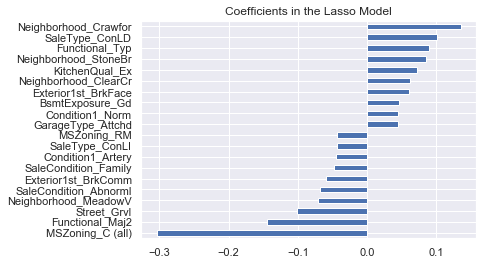

In [102]:
# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()





### Neural Network with Keras/TensorFlow

In [103]:
#import tensorflow as tf
# For TensorFlow v1 compatibily - check https://www.tensorflow.org/guide/migrate
import tensorflow.compat.v1 as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

from sklearn.metrics import mean_squared_error


tf.disable_v2_behavior()
print(tf.VERSION)
#print(tf.__version__)
print(tf.keras.__version__)

Instructions for updating:
non-resource variables are not supported in the long term
2.0.0
2.2.4-tf


In [104]:
# Checking if our machine has GPUs.
with tf.Session() as sess:
#with tf.compat.v1.Session() as sess:
    devices = sess.list_devices()
    print(devices)

[_DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 268435456, 3245099327225939782), _DeviceAttributes(/job:localhost/replica:0/task:0/device:GPU:0, GPU, 3147261542, 9422247229215906598)]


In [154]:
# Definition of the neural network
# Number of node in the hidden layer
H=10
input_dim = X_train.shape[1]

model = models.Sequential()

#Layer 0
# In the hidden layer we just use a linear activation function instead of the usual sigmoid or relu
model.add(layers.Dense(H, input_dim=input_dim, kernel_initializer='normal',
                       activation='relu'))

#Layer 1
model.add(layers.Dense(1, kernel_initializer='normal',
                       activation='linear'))


model.compile(loss='mean_squared_error', optimizer='adam')

model_history = model.fit(X_train, y_train, batch_size=100, epochs=1000) #, verbose=1) 

Train on 1019 samples
Epoch 1/1000
1019/1019 [==============================] - 0s 190us/sample - loss: 7825.9040
Epoch 2/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 3273.4256
Epoch 3/1000
1019/1019 [==============================] - 0s 36us/sample - loss: 2190.6422
Epoch 4/1000
1019/1019 [==============================] - 0s 33us/sample - loss: 768.0762
Epoch 5/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 462.9707
Epoch 6/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 249.5849
Epoch 7/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 137.1901
Epoch 8/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 86.5324
Epoch 9/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 79.0800
Epoch 10/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 82.3675
Epoch 11/1000
1019/1019 [==============================] - 0s 25us/sample - 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.1843
Epoch 93/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1742
Epoch 94/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1760
Epoch 95/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1731
Epoch 96/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1862
Epoch 97/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1769
Epoch 98/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1835
Epoch 99/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.2039
Epoch 100/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.1623
Epoch 101/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.1612
Epoch 102/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1574
Epoch 103/1000
1019/1019 [======

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0739
Epoch 184/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0652
Epoch 185/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0708
Epoch 186/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0704
Epoch 187/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1086
Epoch 188/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0659
Epoch 189/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0698
Epoch 190/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0993
Epoch 191/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.1334
Epoch 192/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.1505
Epoch 193/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0755
Epoch 194/1000
1019/1019 

1019/1019 [==============================] - 0s 23us/sample - loss: 0.7560
Epoch 274/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 3.8889
Epoch 275/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 2.3680
Epoch 276/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 9.3892
Epoch 277/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 8.7286
Epoch 278/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 17.0003
Epoch 279/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 13.6114
Epoch 280/1000
1019/1019 [==============================] - 0s 15us/sample - loss: 11.0039
Epoch 281/1000
1019/1019 [==============================] - 0s 34us/sample - loss: 9.1855
Epoch 282/1000
1019/1019 [==============================] - 0s 21us/sample - loss: 18.9360
Epoch 283/1000
1019/1019 [==============================] - 0s 33us/sample - loss: 12.3728
Epoch 284/1000
1019/

1019/1019 [==============================] - 0s 24us/sample - loss: 0.0270
Epoch 365/1000
1019/1019 [==============================] - 0s 22us/sample - loss: 0.0277
Epoch 366/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0320
Epoch 367/1000
1019/1019 [==============================] - 0s 22us/sample - loss: 0.0290
Epoch 368/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0270
Epoch 369/1000
1019/1019 [==============================] - 0s 21us/sample - loss: 0.0291
Epoch 370/1000
1019/1019 [==============================] - 0s 33us/sample - loss: 0.0266
Epoch 371/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 0.0263
Epoch 372/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0259
Epoch 373/1000
1019/1019 [==============================] - 0s 16us/sample - loss: 0.0283
Epoch 374/1000
1019/1019 [==============================] - 0s 32us/sample - loss: 0.0269
Epoch 375/1000
1019/1019 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0305
Epoch 455/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0275
Epoch 456/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0278
Epoch 457/1000
1019/1019 [==============================] - 0s 22us/sample - loss: 0.0247
Epoch 458/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0261
Epoch 459/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0243
Epoch 460/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0296
Epoch 461/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0262
Epoch 462/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0271
Epoch 463/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0265
Epoch 464/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0651
Epoch 465/1000
1019/1019 

1019/1019 [==============================] - 0s 25us/sample - loss: 0.0338
Epoch 546/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0445
Epoch 547/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0298
Epoch 548/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0435
Epoch 549/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.1476
Epoch 550/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0741
Epoch 551/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0482
Epoch 552/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0444
Epoch 553/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0333
Epoch 554/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0293
Epoch 555/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0326
Epoch 556/1000
1019/1019 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0199
Epoch 637/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0196
Epoch 638/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.0221
Epoch 639/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0211
Epoch 640/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0189
Epoch 641/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0212
Epoch 642/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0217
Epoch 643/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0188
Epoch 644/1000
1019/1019 [==============================] - 0s 28us/sample - loss: 0.0192
Epoch 645/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0198
Epoch 646/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0188
Epoch 647/1000
1019/1019 

1019/1019 [==============================] - 0s 24us/sample - loss: 0.0179
Epoch 727/1000
1019/1019 [==============================] - 0s 13us/sample - loss: 0.0161
Epoch 728/1000
1019/1019 [==============================] - 0s 37us/sample - loss: 0.0178
Epoch 729/1000
1019/1019 [==============================] - 0s 19us/sample - loss: 0.0181
Epoch 730/1000
1019/1019 [==============================] - 0s 34us/sample - loss: 0.0199
Epoch 731/1000
1019/1019 [==============================] - 0s 12us/sample - loss: 0.0226
Epoch 732/1000
1019/1019 [==============================] - 0s 29us/sample - loss: 0.0181
Epoch 733/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0175
Epoch 734/1000
1019/1019 [==============================] - 0s 30us/sample - loss: 0.0236
Epoch 735/1000
1019/1019 [==============================] - 0s 27us/sample - loss: 0.0184
Epoch 736/1000
1019/1019 [==============================] - 0s 10us/sample - loss: 0.0257
Epoch 737/1000
1019/1019 

1019/1019 [==============================] - 0s 26us/sample - loss: 0.0170
Epoch 818/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0173
Epoch 819/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 820/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0181
Epoch 821/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0174
Epoch 822/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0163
Epoch 823/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0162
Epoch 824/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0164
Epoch 825/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0159
Epoch 826/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.0179
Epoch 827/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0166
Epoch 828/1000
1019/1019 

1019/1019 [==============================] - 0s 25us/sample - loss: 0.0170
Epoch 909/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0177
Epoch 910/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0172
Epoch 911/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0146
Epoch 912/1000
1019/1019 [==============================] - 0s 26us/sample - loss: 0.0148
Epoch 913/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.0142
Epoch 914/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0154
Epoch 915/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.0159
Epoch 916/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0220
Epoch 917/1000
1019/1019 [==============================] - 0s 24us/sample - loss: 0.0162
Epoch 918/1000
1019/1019 [==============================] - 0s 25us/sample - loss: 0.0168
Epoch 919/1000
1019/1019 

1019/1019 [==============================] - 0s 24us/sample - loss: 0.0181
Epoch 1000/1000
1019/1019 [==============================] - 0s 23us/sample - loss: 0.0177


In [155]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [156]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_score = model.evaluate(X_train, y_train, verbose=1)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_score = model.evaluate(X_test, y_test, verbose=1)

print('rmse on train: ',train_rmse)
print('Train loss:', train_score)

print('rmse on test: ',test_rmse)
print('Test loss:', test_score)

437/437 [==============================] - 0s 34us/sample - loss: 0.0243
rmse on train:  0.13295513096509542
Train loss: 0.017677068443451592
rmse on test:  0.15603630030324422
Test loss: 0.0243473256377661


In [157]:
# Some constants for the plots
# Ploting the loss function minimization history
FIG_SIZE = (10,5)
FONT_SIZE = 10
LABEL_SIZE = 15
#print(model_history.history.keys)
#for key, value in model_history.history.items() :
#    print (key)
#print(model_history.columns)

loss


Loss function calculation history

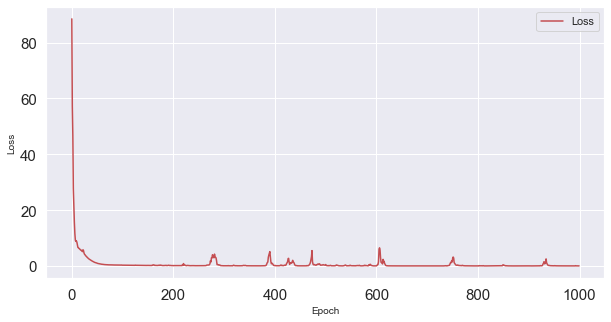

In [158]:
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model_history.history['loss']), 'r',label='Loss' )
#ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)

 Fitting the model with others options

In [167]:
model_history2 = model.fit(X_train, y_train, batch_size=100, epochs=1000, \
                          shuffle = True, validation_split=0.5)

Train on 509 samples, validate on 510 samples
Epoch 1/1000
509/509 [==============================] - 0s 71us/sample - loss: 0.0317 - val_loss: 0.1073
Epoch 2/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.1685 - val_loss: 0.1900
Epoch 3/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.2567 - val_loss: 0.6256
Epoch 4/1000
509/509 [==============================] - 0s 59us/sample - loss: 2.7710 - val_loss: 4.2107
Epoch 5/1000
509/509 [==============================] - 0s 67us/sample - loss: 9.0552 - val_loss: 0.9939
Epoch 6/1000
509/509 [==============================] - 0s 69us/sample - loss: 2.5336 - val_loss: 4.0968
Epoch 7/1000
509/509 [==============================] - 0s 73us/sample - loss: 5.3553 - val_loss: 1.7880
Epoch 8/1000
509/509 [==============================] - 0s 65us/sample - loss: 2.3661 - val_loss: 0.4404
Epoch 9/1000
509/509 [==============================] - 0s 61us/sample - loss: 0.4206 - val_loss: 0.6995
Epoch 10/

Epoch 78/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0132 - val_loss: 0.0161
Epoch 79/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0131 - val_loss: 0.0165
Epoch 80/1000
509/509 [==============================] - 0s 41us/sample - loss: 0.0133 - val_loss: 0.0178
Epoch 81/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0141 - val_loss: 0.0180
Epoch 82/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0139 - val_loss: 0.0170
Epoch 83/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0132 - val_loss: 0.0179
Epoch 84/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.0144 - val_loss: 0.0194
Epoch 85/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0146 - val_loss: 0.0163
Epoch 86/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0133 - val_loss: 0.0164
Epoch 87/1000
509/509 [=======================

509/509 [==============================] - 0s 45us/sample - loss: 0.0122 - val_loss: 0.0156
Epoch 155/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0117 - val_loss: 0.0155
Epoch 156/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0117 - val_loss: 0.0157
Epoch 157/1000
509/509 [==============================] - 0s 55us/sample - loss: 0.0119 - val_loss: 0.0170
Epoch 158/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0127 - val_loss: 0.0173
Epoch 159/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0134 - val_loss: 0.0161
Epoch 160/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0117 - val_loss: 0.0159
Epoch 161/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0119 - val_loss: 0.0173
Epoch 162/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0133 - val_loss: 0.0185
Epoch 163/1000
509/509 [============================

509/509 [==============================] - 0s 47us/sample - loss: 0.0122 - val_loss: 0.0173
Epoch 231/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0143 - val_loss: 0.0165
Epoch 232/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0115 - val_loss: 0.0174
Epoch 233/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0125 - val_loss: 0.0159
Epoch 234/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0110 - val_loss: 0.0175
Epoch 235/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0124 - val_loss: 0.0183
Epoch 236/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0126 - val_loss: 0.0165
Epoch 237/1000
509/509 [==============================] - 0s 55us/sample - loss: 0.0109 - val_loss: 0.0172
Epoch 238/1000
509/509 [==============================] - 0s 55us/sample - loss: 0.0117 - val_loss: 0.0175
Epoch 239/1000
509/509 [============================

509/509 [==============================] - 0s 43us/sample - loss: 0.0119 - val_loss: 0.0219
Epoch 307/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0131 - val_loss: 0.0220
Epoch 308/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0136 - val_loss: 0.0163
Epoch 309/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0114 - val_loss: 0.0204
Epoch 310/1000
509/509 [==============================] - 0s 53us/sample - loss: 0.0129 - val_loss: 0.0201
Epoch 311/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0109 - val_loss: 0.0163
Epoch 312/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0112 - val_loss: 0.0219
Epoch 313/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0149 - val_loss: 0.0250
Epoch 314/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.0139 - val_loss: 0.0168
Epoch 315/1000
509/509 [============================

509/509 [==============================] - 0s 47us/sample - loss: 0.0442 - val_loss: 0.0258
Epoch 383/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0235 - val_loss: 0.0265
Epoch 384/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0163 - val_loss: 0.0182
Epoch 385/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0109 - val_loss: 0.0160
Epoch 386/1000
509/509 [==============================] - 0s 53us/sample - loss: 0.0099 - val_loss: 0.0234
Epoch 387/1000
509/509 [==============================] - 0s 31us/sample - loss: 0.0139 - val_loss: 0.0159
Epoch 388/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0143 - val_loss: 0.0173
Epoch 389/1000
509/509 [==============================] - 0s 62us/sample - loss: 0.0109 - val_loss: 0.0166
Epoch 390/1000
509/509 [==============================] - 0s 53us/sample - loss: 0.0115 - val_loss: 0.0199
Epoch 391/1000
509/509 [============================

509/509 [==============================] - 0s 39us/sample - loss: 0.0120 - val_loss: 0.0192
Epoch 459/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0123 - val_loss: 0.0156
Epoch 460/1000
509/509 [==============================] - 0s 33us/sample - loss: 0.0127 - val_loss: 0.0211
Epoch 461/1000
509/509 [==============================] - 0s 65us/sample - loss: 0.0145 - val_loss: 0.0155
Epoch 462/1000
509/509 [==============================] - 0s 52us/sample - loss: 0.0121 - val_loss: 0.0168
Epoch 463/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0117 - val_loss: 0.0175
Epoch 464/1000
509/509 [==============================] - 0s 44us/sample - loss: 0.0113 - val_loss: 0.0167
Epoch 465/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.0119 - val_loss: 0.0215
Epoch 466/1000
509/509 [==============================] - 0s 26us/sample - loss: 0.0131 - val_loss: 0.0184
Epoch 467/1000
509/509 [============================

509/509 [==============================] - 0s 47us/sample - loss: 0.0680 - val_loss: 0.0635
Epoch 535/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0630 - val_loss: 0.0261
Epoch 536/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0275 - val_loss: 0.0431
Epoch 537/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0342 - val_loss: 0.0173
Epoch 538/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0172 - val_loss: 0.0441
Epoch 539/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0463 - val_loss: 0.0194
Epoch 540/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0321 - val_loss: 0.0363
Epoch 541/1000
509/509 [==============================] - ETA: 0s - loss: 0.093 - 0s 47us/sample - loss: 0.0652 - val_loss: 0.0817
Epoch 542/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0902 - val_loss: 0.0753
Epoch 543/1000
509/509 [====

509/509 [==============================] - 0s 65us/sample - loss: 0.0860 - val_loss: 0.0312
Epoch 611/1000
509/509 [==============================] - 0s 50us/sample - loss: 0.0355 - val_loss: 0.0298
Epoch 612/1000
509/509 [==============================] - 0s 19us/sample - loss: 0.0193 - val_loss: 0.0351
Epoch 613/1000
509/509 [==============================] - 0s 62us/sample - loss: 0.0204 - val_loss: 0.0200
Epoch 614/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.0132 - val_loss: 0.0177
Epoch 615/1000
509/509 [==============================] - 0s 39us/sample - loss: 0.0136 - val_loss: 0.0162
Epoch 616/1000
509/509 [==============================] - 0s 58us/sample - loss: 0.0111 - val_loss: 0.0165
Epoch 617/1000
509/509 [==============================] - 0s 50us/sample - loss: 0.0108 - val_loss: 0.0157
Epoch 618/1000
509/509 [==============================] - 0s 50us/sample - loss: 0.0110 - val_loss: 0.0172
Epoch 619/1000
509/509 [============================

509/509 [==============================] - 0s 55us/sample - loss: 0.0140 - val_loss: 0.0166
Epoch 687/1000
509/509 [==============================] - 0s 27us/sample - loss: 0.0116 - val_loss: 0.0156
Epoch 688/1000
509/509 [==============================] - 0s 55us/sample - loss: 0.0109 - val_loss: 0.0179
Epoch 689/1000
509/509 [==============================] - 0s 28us/sample - loss: 0.0118 - val_loss: 0.0423
Epoch 690/1000
509/509 [==============================] - 0s 71us/sample - loss: 0.0224 - val_loss: 0.0407
Epoch 691/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0193 - val_loss: 0.0203
Epoch 692/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0139 - val_loss: 0.0158
Epoch 693/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0118 - val_loss: 0.0176
Epoch 694/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0119 - val_loss: 0.0159
Epoch 695/1000
509/509 [============================

509/509 [==============================] - 0s 47us/sample - loss: 0.0260 - val_loss: 0.0156
Epoch 763/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0150 - val_loss: 0.0251
Epoch 764/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0138 - val_loss: 0.0615
Epoch 765/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.1166 - val_loss: 0.1062
Epoch 766/1000
509/509 [==============================] - 0s 51us/sample - loss: 0.0386 - val_loss: 0.0268
Epoch 767/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0482 - val_loss: 0.0485
Epoch 768/1000
509/509 [==============================] - 0s 53us/sample - loss: 0.0377 - val_loss: 0.0199
Epoch 769/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0127 - val_loss: 0.0246
Epoch 770/1000
509/509 [==============================] - 0s 52us/sample - loss: 0.0184 - val_loss: 0.0158
Epoch 771/1000
509/509 [============================

509/509 [==============================] - 0s 43us/sample - loss: 0.0158 - val_loss: 0.0189
Epoch 839/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0168 - val_loss: 0.0210
Epoch 840/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0170 - val_loss: 0.0183
Epoch 841/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0158 - val_loss: 0.0190
Epoch 842/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0157 - val_loss: 0.0257
Epoch 843/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0184 - val_loss: 0.0205
Epoch 844/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0198 - val_loss: 0.0179
Epoch 845/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0181 - val_loss: 0.0203
Epoch 846/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0166 - val_loss: 0.0194
Epoch 847/1000
509/509 [============================

509/509 [==============================] - 0s 43us/sample - loss: 0.0155 - val_loss: 0.0175
Epoch 915/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0146 - val_loss: 0.0167
Epoch 916/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0140 - val_loss: 0.0161
Epoch 917/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0136 - val_loss: 0.0210
Epoch 918/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0158 - val_loss: 0.0181
Epoch 919/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0144 - val_loss: 0.0219
Epoch 920/1000
509/509 [==============================] - 0s 43us/sample - loss: 0.0177 - val_loss: 0.0161
Epoch 921/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0132 - val_loss: 0.0159
Epoch 922/1000
509/509 [==============================] - 0s 41us/sample - loss: 0.0133 - val_loss: 0.0161
Epoch 923/1000
509/509 [============================

509/509 [==============================] - 0s 51us/sample - loss: 0.0138 - val_loss: 0.0174
Epoch 991/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0139 - val_loss: 0.0208
Epoch 992/1000
509/509 [==============================] - 0s 53us/sample - loss: 0.0145 - val_loss: 0.0204
Epoch 993/1000
509/509 [==============================] - 0s 69us/sample - loss: 0.0144 - val_loss: 0.0159
Epoch 994/1000
509/509 [==============================] - 0s 61us/sample - loss: 0.0133 - val_loss: 0.0165
Epoch 995/1000
509/509 [==============================] - 0s 45us/sample - loss: 0.0146 - val_loss: 0.0158
Epoch 996/1000
509/509 [==============================] - 0s 49us/sample - loss: 0.0125 - val_loss: 0.0156
Epoch 997/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0123 - val_loss: 0.0182
Epoch 998/1000
509/509 [==============================] - 0s 47us/sample - loss: 0.0142 - val_loss: 0.0228
Epoch 999/1000
509/509 [============================

In [168]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [169]:
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_score = model.evaluate(X_train, y_train, verbose=1)

test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_score = model.evaluate(X_test, y_test, verbose=1)

print('rmse on train: ',train_rmse)
print('Train loss:', train_score)

print('rmse on test: ',test_rmse)
print('Test loss:', test_score)

437/437 [==============================] - 0s 41us/sample - loss: 0.0266
rmse on train:  0.1523546805429268
Train loss: 0.02321195040515992
rmse on test:  0.1630733125435104
Test loss: 0.026592907868751944


Loss Function calculation history for training and validation

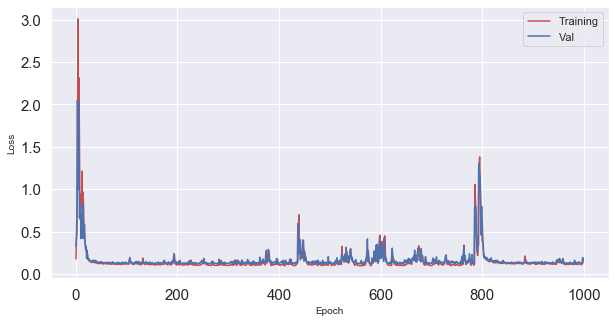

In [171]:
fig, ax = plt.subplots(1, 1, figsize=FIG_SIZE)
ax.plot(np.sqrt(model_history2.history['loss']), 'r', label='Training')
ax.plot(np.sqrt(model_history2.history['val_loss']), 'b' ,label='Val')
ax.set_xlabel(r'Epoch', fontsize=FONT_SIZE)
ax.set_ylabel(r'Loss', fontsize=FONT_SIZE)
ax.legend()
ax.tick_params(labelsize=LABEL_SIZE)